In [12]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Tuple,List

In [13]:
def towerOfHanoi(n):
    tower = [[i for i in reversed(range(n))], [], []]
    whichDiskMoved = [-1 for _ in range(2**n-1)]
    whatMoveWasMade = [-1 for _ in range(2**n-1)]
    move = -1
    def solve(n, source, middle, destination):
        if n <= 0:
            return
        sourceTower = tower[source]
        destinationTower = tower[destination]
        solve(n-1,source,destination,middle)
        destinationTower.append(sourceTower.pop())
        nonlocal move
        move+=1
        whichDiskMoved[move] = destinationTower[-1]
        whatMoveWasMade[move] = [whichDiskMoved[move],source,destination]
        solve(n-1,middle,source,destination)
    solve(n,0,1,2)
    return (whichDiskMoved, whatMoveWasMade)
n = 5
whichDiskMoved,whatMoveWasMade = towerOfHanoi(n)

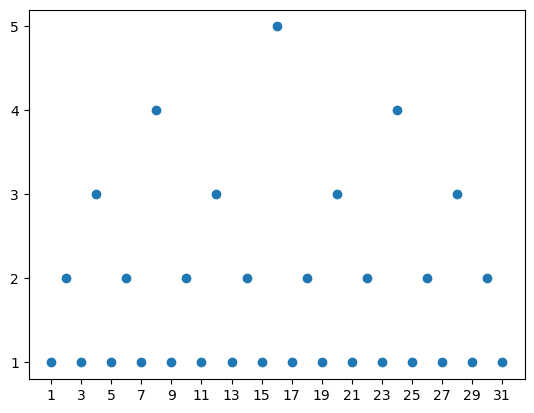

In [14]:
plt.scatter([i+1 for i in range(len(whichDiskMoved))], [d+1 for d in whichDiskMoved])
plt.xticks(np.arange(1, len(whichDiskMoved)+1, 2.0))
plt.yticks(np.arange(1, n+1, 1.0))
plt.show()

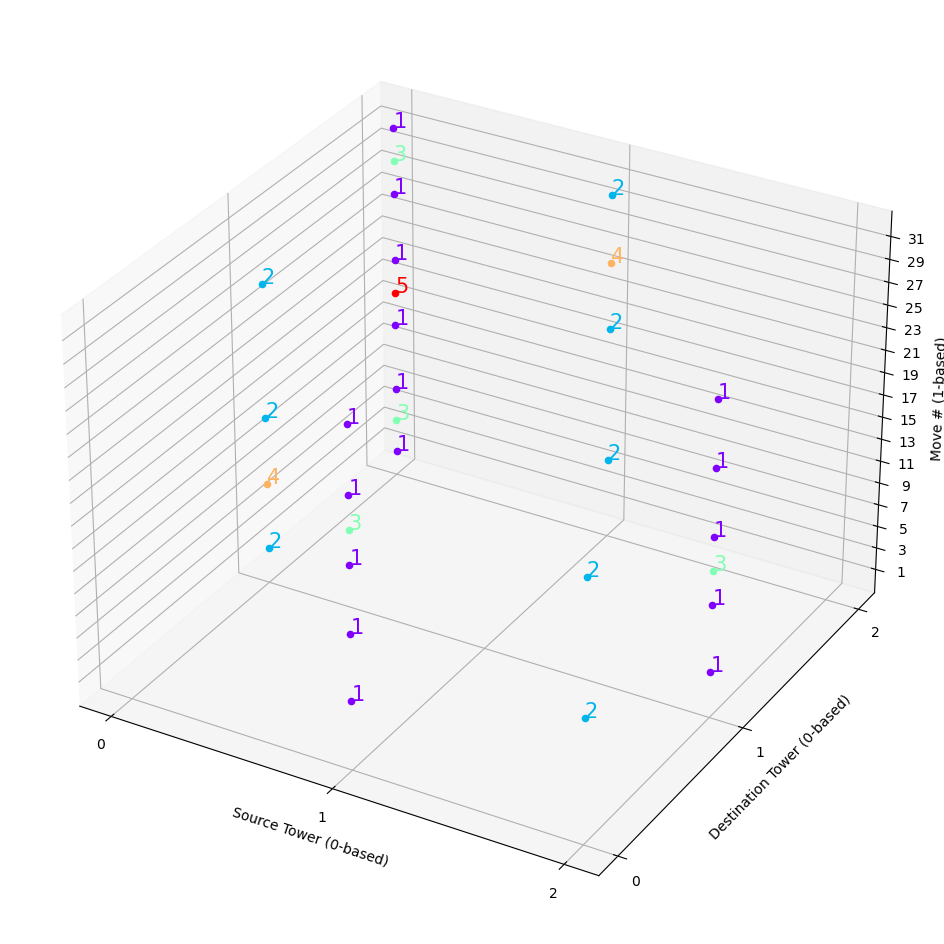

In [15]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
colors = {disk:color for disk,color in zip(range(1,n+1),iter(plt.cm.rainbow(np.linspace(0, 1, n))))}
for idx,triplet in enumerate(whatMoveWasMade):
    disk,source,dest = triplet
    disk+=1
    move = idx+1
    color = colors[disk]
    ax.scatter(source,dest,move,color=color)
    ax.text(source,dest,move,  '%s' % (str(disk)), size=15, zorder=1, color=color)
ax.set_xlabel('Source Tower (0-based)')
ax.set_xticks(np.arange(0, 3, 1.0))
ax.set_ylabel('Destination Tower (0-based)')
ax.set_yticks(np.arange(0, 3, 1.0))
ax.set_zlabel('Move # (1-based)')
ax.set_zticks(np.arange(1, len(whichDiskMoved)+1, 2.0))
plt.show()

In [130]:
# def whichDiskMovesAndWhere(m:int,n:int)->Tuple[int]:
#     if not (1 <= m <= 2**n - 1):
#         # Move number must be between 1 and 2**n - 1 inclusive 
#         return None
#     # The disk that moves on move m is d = 1 + (number of times m is halved until m is odd)
#     d = 1 # Assume disks are indexed from 1 to n inclusive (with n being the largest disk)
#     m_ = m
#     while m_ % 2 == 0:
#         m_ >>= 1
#         d += 1
#     # d = supp(m)+1
#     # Let us find the destination tower
#     # NOTE: If disk d moves on move m, disk d's next move will be m + 2^d
#     movesMadeBeforehand = m // (2**d)
#     destination = (movesMadeBeforehand+1) * (-1 if d%2 == n%2 else 1)
#     destination %= 3
#     return (d, destination)
def whereIsDiskAfterMove(d:int, m:int,n:int)->Tuple[int]:
    if not (1<=d<=n) or not (0 <= m <= 2**n - 1):
        # Disk index must be between 1 and n inclusive
        # Also, move number must be between 1 and 2**n - 1 inclusive 
        return None
    # Let us find the destination tower
    # NOTE: If disk d moves on move m, disk d's next move will be m + 2^d
    movesMadeBeforehand = m // (2**d)
    destination = (movesMadeBeforehand+(m>=((2**(d-1))*(2*movesMadeBeforehand+1)))) * (-1 if d%2 == n%2 else 1)
    destination %= 3
    return destination

In [131]:
# whatMoveWasMade2 = [whichDiskMovesAndWhere(m,n) for m in range(1,2**n)]
diskLocations = [[0 for _ in range(n)] for _ in range(2**n)]
for d in range(1,n+1):
    for m0 in range(2**(d-1),2**n,2**d):
        destination = whereIsDiskAfterMove(d,m0,n)
        for m1 in range(m0,min(m0+2**d,2**n)):
            diskLocations[m1-1][d-1] = destination

In [132]:
for i in range(2**n):
    print(f"{i} = {diskLocations[i-1]}")

0 = [0, 0, 0, 0, 0]
1 = [2, 0, 0, 0, 0]
2 = [2, 1, 0, 0, 0]
3 = [1, 1, 0, 0, 0]
4 = [1, 1, 2, 0, 0]
5 = [0, 1, 2, 0, 0]
6 = [0, 2, 2, 0, 0]
7 = [2, 2, 2, 0, 0]
8 = [2, 2, 2, 1, 0]
9 = [1, 2, 2, 1, 0]
10 = [1, 0, 2, 1, 0]
11 = [0, 0, 2, 1, 0]
12 = [0, 0, 1, 1, 0]
13 = [2, 0, 1, 1, 0]
14 = [2, 1, 1, 1, 0]
15 = [1, 1, 1, 1, 0]
16 = [1, 1, 1, 1, 2]
17 = [0, 1, 1, 1, 2]
18 = [0, 2, 1, 1, 2]
19 = [2, 2, 1, 1, 2]
20 = [2, 2, 0, 1, 2]
21 = [1, 2, 0, 1, 2]
22 = [1, 0, 0, 1, 2]
23 = [0, 0, 0, 1, 2]
24 = [0, 0, 0, 2, 2]
25 = [2, 0, 0, 2, 2]
26 = [2, 1, 0, 2, 2]
27 = [1, 1, 0, 2, 2]
28 = [1, 1, 2, 2, 2]
29 = [0, 1, 2, 2, 2]
30 = [0, 2, 2, 2, 2]
31 = [2, 2, 2, 2, 2]


In [133]:
# If you're given move m and n (total number of disks),
#   write a Python function to draw the current situation right after move m finishes
def diskLocationsAfterMove(m:int, n:int)->List[int]:
    if not (0 <= m <= 2**n - 1):
        # Move number must be between 1 and 2**n - 1 inclusive 
        return None
    diskLocations = [0 for _ in range(n)]
    for d in range(1,n+1):
        destination = whereIsDiskAfterMove(d,m,n)
        # print(f"disk {d} is now at tower {destination} after move {m}")
        diskLocations[d-1] = destination
    return diskLocations
for i in range(2**n):
    print(f"{i} = {diskLocationsAfterMove(i,n)}")

0 = [0, 0, 0, 0, 0]
1 = [2, 0, 0, 0, 0]
2 = [2, 1, 0, 0, 0]
3 = [1, 1, 0, 0, 0]
4 = [1, 1, 2, 0, 0]
5 = [0, 1, 2, 0, 0]
6 = [0, 2, 2, 0, 0]
7 = [2, 2, 2, 0, 0]
8 = [2, 2, 2, 1, 0]
9 = [1, 2, 2, 1, 0]
10 = [1, 0, 2, 1, 0]
11 = [0, 0, 2, 1, 0]
12 = [0, 0, 1, 1, 0]
13 = [2, 0, 1, 1, 0]
14 = [2, 1, 1, 1, 0]
15 = [1, 1, 1, 1, 0]
16 = [1, 1, 1, 1, 2]
17 = [0, 1, 1, 1, 2]
18 = [0, 2, 1, 1, 2]
19 = [2, 2, 1, 1, 2]
20 = [2, 2, 0, 1, 2]
21 = [1, 2, 0, 1, 2]
22 = [1, 0, 0, 1, 2]
23 = [0, 0, 0, 1, 2]
24 = [0, 0, 0, 2, 2]
25 = [2, 0, 0, 2, 2]
26 = [2, 1, 0, 2, 2]
27 = [1, 1, 0, 2, 2]
28 = [1, 1, 2, 2, 2]
29 = [0, 1, 2, 2, 2]
30 = [0, 2, 2, 2, 2]
31 = [2, 2, 2, 2, 2]


[0, 1, 2, 2, 2]


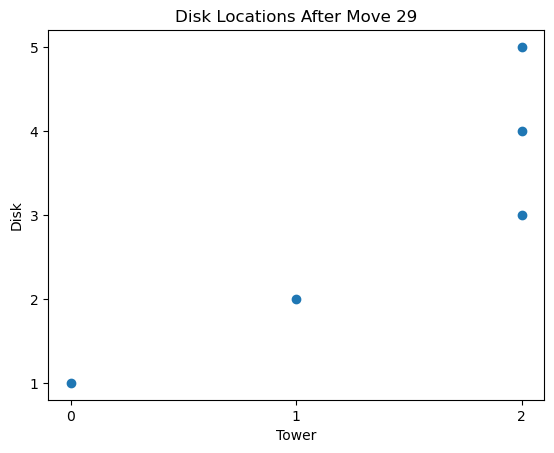

In [138]:
# Graph the results of diskLocationsAfterMove() for any arbitrary pair of arguments
m = 29
diskLocations = diskLocationsAfterMove(m,n)
print(diskLocations)
plt.scatter(diskLocations, [d+1 for d,tower in enumerate(diskLocations)])
plt.title(f"Disk Locations After Move {m}")
plt.xticks(np.arange(0, 3, 1.0))
plt.xlabel("Tower")
plt.yticks(np.arange(1, n+1, 1.0))
plt.ylabel("Disk")
plt.show()

NameError: name 'whatMoveWasMade2' is not defined

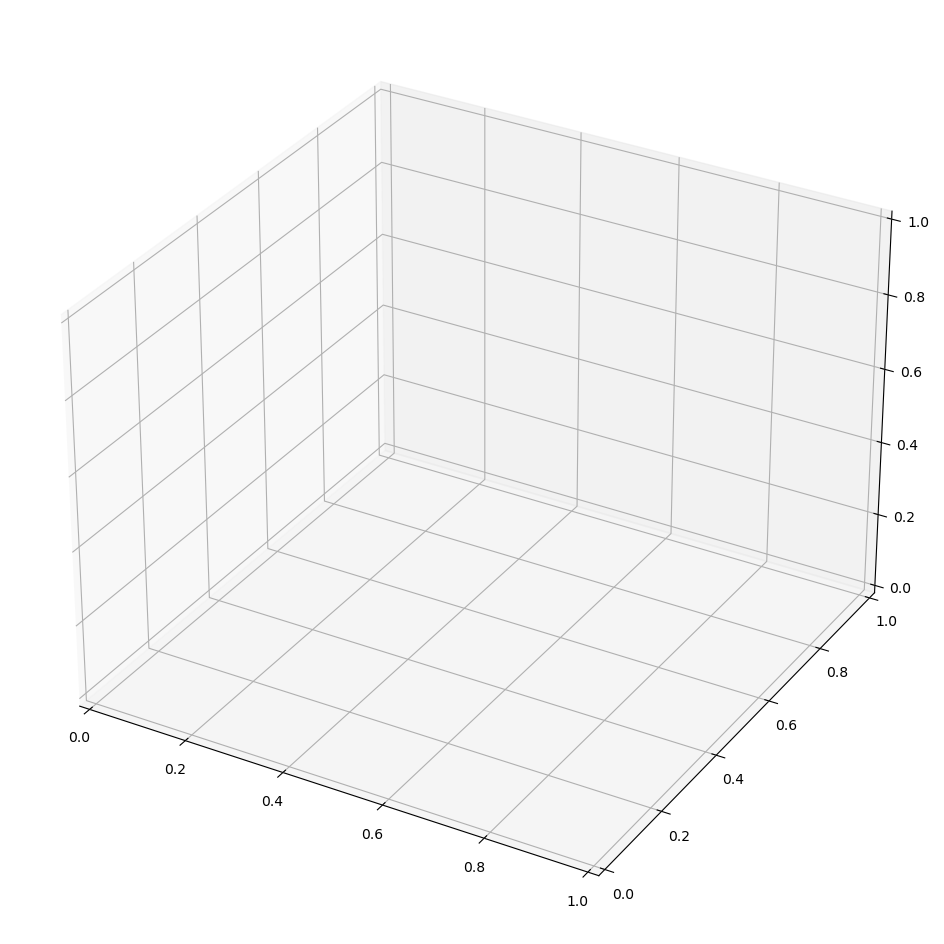

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
for idx,tup in enumerate(whatMoveWasMade2):
    disk,dest = tup
    move = idx+1
    color = colors[disk]
    source = 0 if move-2**disk <=0 else whichDiskMovesAndWhere(move-2**disk,n)[1]
    ax.scatter(source,dest,move,color=color)
    ax.text(source,dest,move,  '%s' % (str(disk)), size=15, zorder=1, color=color)
ax.set_xlabel('Source Tower (0-based)')
ax.set_xticks(np.arange(0, 3, 1.0))
ax.set_ylabel('Destination Tower (0-based)')
ax.set_yticks(np.arange(0, 3, 1.0))
ax.set_zlabel('Move # (1-based)')
ax.set_zticks(np.arange(1, len(whichDiskMoved)+1, 2.0))
plt.show()